In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create random longitude and latitudes
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
coordinates[200]

(-38.736933053647036, -53.89029065124819)

In [5]:
from citipy import citipy

In [6]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)


611

In [7]:
cities

['provideniya',
 'vaini',
 'katherine',
 'cape town',
 'ribeira grande',
 'te anau',
 'vila velha',
 'puerto ayora',
 'guerrero negro',
 'kummersbruck',
 'mys shmidta',
 'taolanaro',
 'quatre cocos',
 'ruatoria',
 'huaidian',
 'makakilo city',
 'mvangue',
 'norman wells',
 'jamestown',
 'ostrovnoy',
 'ushuaia',
 'busselton',
 'ilulissat',
 'punta arenas',
 'vanimo',
 'barrow',
 'mahebourg',
 'samusu',
 'lorengau',
 'kitale',
 'hamilton',
 'nishihara',
 'cabo san lucas',
 'kailua',
 'mataura',
 'mar del plata',
 'nome',
 'port alfred',
 'carnarvon',
 'letnyaya stavka',
 'bognor regis',
 'kawalu',
 'denpasar',
 'avarua',
 'noumea',
 'nanortalik',
 'hilo',
 'korla',
 'khonsa',
 'luorong',
 'kungurtug',
 'mangrol',
 'bluff',
 'sao felix do xingu',
 'ancud',
 'atuona',
 'rikitea',
 'swan river',
 'sundsvall',
 'cidreira',
 'erenhot',
 'port said',
 'muros',
 'bathsheba',
 'torbay',
 'nemuro',
 'hambantota',
 'ketchikan',
 'souillac',
 'chauk',
 'albany',
 'chokurdakh',
 'pangkalanbuun',
 'l

In [8]:
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
from datetime import datetime

In [11]:
cities[3]

'cape town'

In [12]:
#create empty list to hold weather data
city_data = []
#logging print
print("Beginning Data Retrieval        ")
print("--------------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all cities
for i, city in enumerate(cities):
    #group cities in sets of 50
    if(i % 50 == 0 and i >+ 50):
        set_count += 1
        record_count = 1
    #create endpoint URL
    city_url = url + "&q=" + city.replace(" ","+")
    print(f"Processing record {record_count} of Set {set_count} | {city}")
    record_count += 1

Beginning Data Retrieval        
--------------------------------
Processing record 1 of Set 1 | provideniya
Processing record 2 of Set 1 | vaini
Processing record 3 of Set 1 | katherine
Processing record 4 of Set 1 | cape town
Processing record 5 of Set 1 | ribeira grande
Processing record 6 of Set 1 | te anau
Processing record 7 of Set 1 | vila velha
Processing record 8 of Set 1 | puerto ayora
Processing record 9 of Set 1 | guerrero negro
Processing record 10 of Set 1 | kummersbruck
Processing record 11 of Set 1 | mys shmidta
Processing record 12 of Set 1 | taolanaro
Processing record 13 of Set 1 | quatre cocos
Processing record 14 of Set 1 | ruatoria
Processing record 15 of Set 1 | huaidian
Processing record 16 of Set 1 | makakilo city
Processing record 17 of Set 1 | mvangue
Processing record 18 of Set 1 | norman wells
Processing record 19 of Set 1 | jamestown
Processing record 20 of Set 1 | ostrovnoy
Processing record 21 of Set 1 | ushuaia
Processing record 22 of Set 1 | busselton


In [13]:
# run API with try loop
#create empty list to hold weather data
city_data = []
#logging print
print("Beginning Data Retrieval        ")
print("--------------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all cities
for i, city in enumerate(cities):
    #group cities in sets of 50
    if(i % 50 == 0 and i >+ 50):
        set_count += 1
        record_count = 1
    #create endpoint URL
    city_url = url + "&q=" + city.replace(" ","+")
    print(f"Processing record {record_count} of Set {set_count} | {city}")
    record_count += 1
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        print("city not found.  Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval        
--------------------------------
Processing record 1 of Set 1 | provideniya
Processing record 2 of Set 1 | vaini
Processing record 3 of Set 1 | katherine
Processing record 4 of Set 1 | cape town
Processing record 5 of Set 1 | ribeira grande
Processing record 6 of Set 1 | te anau
Processing record 7 of Set 1 | vila velha
Processing record 8 of Set 1 | puerto ayora
Processing record 9 of Set 1 | guerrero negro
Processing record 10 of Set 1 | kummersbruck
Processing record 11 of Set 1 | mys shmidta
city not found.  Skipping...
Processing record 12 of Set 1 | taolanaro
city not found.  Skipping...
Processing record 13 of Set 1 | quatre cocos
Processing record 14 of Set 1 | ruatoria
city not found.  Skipping...
Processing record 15 of Set 1 | huaidian
Processing record 16 of Set 1 | makakilo city
Processing record 17 of Set 1 | mvangue
Processing record 18 of Set 1 | norman wells
Processing record 19 of Set 1 | jamestown
Processing record 20 of Set 1 | ostro

Processing record 36 of Set 3 | tiksi
Processing record 37 of Set 3 | saint-philippe
Processing record 38 of Set 3 | dali
Processing record 39 of Set 3 | arraial do cabo
Processing record 40 of Set 3 | hami
Processing record 41 of Set 3 | isangel
Processing record 42 of Set 3 | pevek
Processing record 43 of Set 3 | pokhara
Processing record 44 of Set 3 | port elizabeth
Processing record 45 of Set 3 | sorong
Processing record 46 of Set 3 | grootfontein
Processing record 47 of Set 3 | cherskiy
Processing record 48 of Set 3 | lavrentiya
Processing record 49 of Set 3 | bafoulabe
Processing record 50 of Set 3 | taree
Processing record 1 of Set 4 | ust-kut
Processing record 2 of Set 4 | kirensk
Processing record 3 of Set 4 | kahului
Processing record 4 of Set 4 | henties bay
Processing record 5 of Set 4 | kazalinsk
city not found.  Skipping...
Processing record 6 of Set 4 | yambio
Processing record 7 of Set 4 | mnogovershinnyy
Processing record 8 of Set 4 | salmas
Processing record 9 of Set 

Processing record 22 of Set 7 | agua verde
Processing record 23 of Set 7 | mount gambier
Processing record 24 of Set 7 | ningan
city not found.  Skipping...
Processing record 25 of Set 7 | zlatoustovsk
city not found.  Skipping...
Processing record 26 of Set 7 | el wasta
city not found.  Skipping...
Processing record 27 of Set 7 | rocha
Processing record 28 of Set 7 | zvishavane
Processing record 29 of Set 7 | paripiranga
Processing record 30 of Set 7 | clarence town
Processing record 31 of Set 7 | rio grande
Processing record 32 of Set 7 | yarada
Processing record 33 of Set 7 | lagoa
Processing record 34 of Set 7 | zhigansk
Processing record 35 of Set 7 | olkhovka
Processing record 36 of Set 7 | aksu
Processing record 37 of Set 7 | tsiroanomandidy
Processing record 38 of Set 7 | coquimbo
Processing record 39 of Set 7 | leningradskiy
Processing record 40 of Set 7 | vuktyl
Processing record 41 of Set 7 | sangin
Processing record 42 of Set 7 | tuatapere
Processing record 43 of Set 7 | me

Processing record 10 of Set 11 | la ronge
Processing record 11 of Set 11 | thunder bay
Processing record 12 of Set 11 | aleksandrov
Processing record 13 of Set 11 | soe
Processing record 14 of Set 11 | kintampo
Processing record 15 of Set 11 | san juan
Processing record 16 of Set 11 | codajas
Processing record 17 of Set 11 | carnduff
Processing record 18 of Set 11 | pitimbu
Processing record 19 of Set 11 | mastic beach
Processing record 20 of Set 11 | taburi
city not found.  Skipping...
Processing record 21 of Set 11 | fortuna
Processing record 22 of Set 11 | dingle
Processing record 23 of Set 11 | tilichiki
Processing record 24 of Set 11 | zverinogolovskoye
Processing record 25 of Set 11 | meyungs
city not found.  Skipping...
Processing record 26 of Set 11 | aykhal
Processing record 27 of Set 11 | winona
Processing record 28 of Set 11 | balad
Processing record 29 of Set 11 | nuuk
Processing record 30 of Set 11 | banjar
Processing record 31 of Set 11 | kerrville
Processing record 32 of

In [14]:
len(city_data)

560

In [16]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,43.59,65,100,12.62,RU,2021-09-18 01:10:05
1,Vaini,-21.2000,-175.2000,76.82,81,5,7.47,TO,2021-09-18 01:10:05
2,Katherine,-14.4667,132.2667,91.11,19,50,9.24,AU,2021-09-18 01:10:06
3,Cape Town,-33.9258,18.4232,56.88,77,0,4.00,ZA,2021-09-18 01:05:47
4,Ribeira Grande,38.5167,-28.7000,69.19,79,99,6.91,PT,2021-09-18 01:10:06


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2021-09-18 01:10:05,64.3833,-173.3000,43.59,65,100,12.62
1,Vaini,TO,2021-09-18 01:10:05,-21.2000,-175.2000,76.82,81,5,7.47
2,Katherine,AU,2021-09-18 01:10:06,-14.4667,132.2667,91.11,19,50,9.24
3,Cape Town,ZA,2021-09-18 01:05:47,-33.9258,18.4232,56.88,77,0,4.00
4,Ribeira Grande,PT,2021-09-18 01:10:06,38.5167,-28.7000,69.19,79,99,6.91


In [21]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [22]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

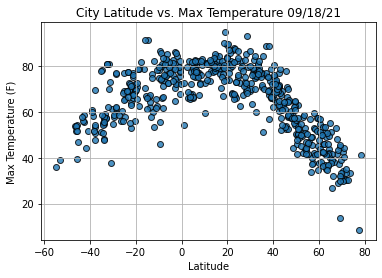

In [26]:
import time
# Build the scatter plots for latitude vs. Temp.
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data.Fig1.png")
plt.show()

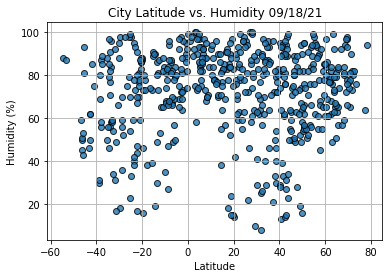

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

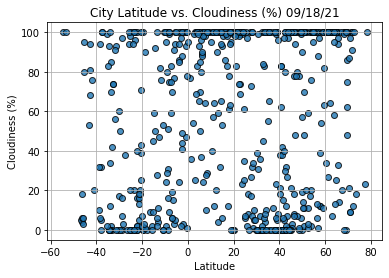

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

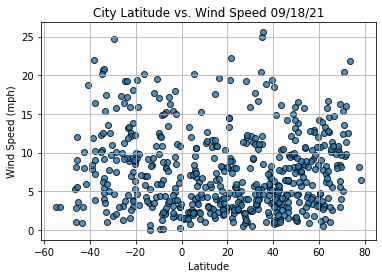

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #run regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    #calculate the regression line y-values from slope intercept
    regress_values = x_values * slope + intercept
    #get equation
    line_eq = "y = " + str(round(slope, 2 )) + "x + " + str(round(intercept, 2))
    #create scatter
    print(r_value)
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #annotate the text for regression equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                      Mvangue
Country                        CM
Date          2021-09-18 01:10:10
Lat                        2.9667
Lng                       11.5167
Max Temp                    66.09
Humidity                      100
Cloudiness                    100
Wind Speed                   2.33
Name: 13, dtype: object

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2021-09-18 01:10:05,64.3833,-173.3000,43.59,65,100,12.62
4,Ribeira Grande,PT,2021-09-18 01:10:06,38.5167,-28.7000,69.19,79,99,6.91
8,Guerrero Negro,MX,2021-09-18 01:10:08,27.9769,-114.0611,71.15,74,32,19.22
9,Kummersbruck,DE,2021-09-18 01:10:08,49.4192,11.8883,55.81,94,6,1.61
11,Huaidian,CN,2021-09-18 01:10:09,33.4333,115.0333,77.70,70,83,10.45


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

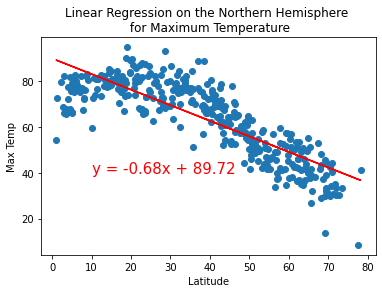

In [38]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
#call function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (10, 40))

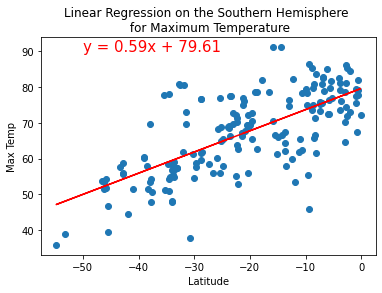

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

-0.09567743402914788


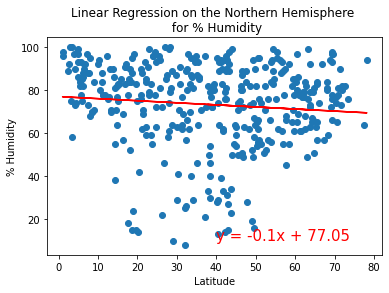

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

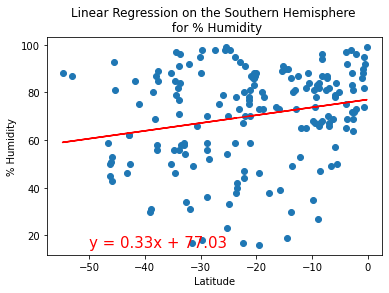

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [47]:
def r_value(x_values, y_values):
    #run regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(r_value)

In [48]:
r_value(x_values, y_values)

0.21723350362033517


0.151602619608975


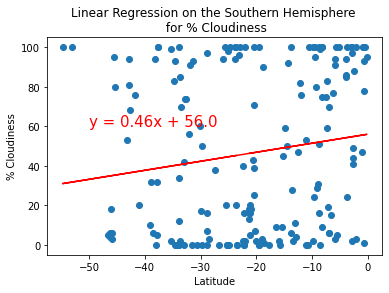

In [52]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

-0.035069510908367636


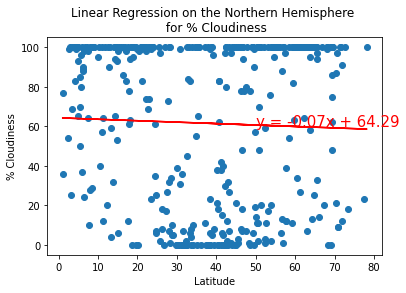

In [56]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(50,60))

0.18571562131656041


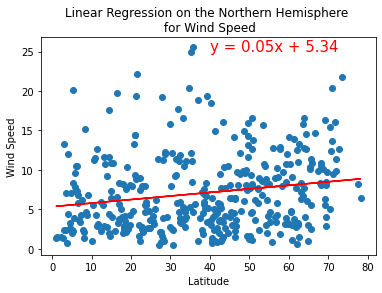

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))

-0.10004340308251955


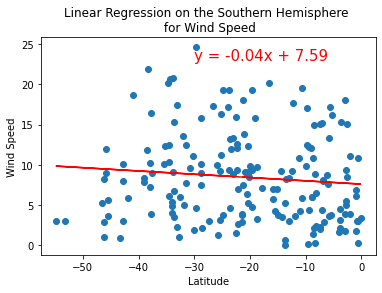

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-30,23))